## Exercicio 8
Ana Moreira \
Damião Goes

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

In [7]:
df = pd.read_csv(r'C:\Users\Damião\Desktop\Isa\Mestrado\2_semestre\Avdcaa\greends-avcad-2024\greends-avcad-2024\examples\EFIplus_medit.zip', compression='zip', sep=";")

In [8]:
# clear de NaN values from the dataset
df = df.dropna()

In [9]:
# select the variables to be used in the analysis
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

In [ ]:
df.head(10)

In [ ]:
list(df.columns)

In [12]:
# Get a statistical summary of the data
summary = df.describe()
# Print the summary
print(summary)


          Latitude    Longitude       Galiza    Subsample  Calib_EFI_Medit  \
count  2822.000000  2822.000000  2822.000000  2822.000000      2822.000000   
mean     41.931580    -6.706420     0.507442     0.633239         0.423459   
std       1.584260     3.199233     0.500033     0.482006         0.494194   
min      36.874237    -9.459453     0.000000     0.000000         0.000000   
25%      41.214742    -8.226473     0.000000     0.000000         0.000000   
50%      42.542777    -7.556175     1.000000     1.000000         0.000000   
75%      43.078987    -6.728577     1.000000     1.000000         1.000000   
max      43.703384    15.509653     1.000000     1.000000         1.000000   

       Calib_connect  Calib_hydrol  Calib_morphol  Calib_wqual    Geomorph1  \
count    2822.000000   2822.000000    2822.000000  2822.000000  2822.000000   
mean        0.742381      0.643161       0.556343     0.484054     0.274984   
std         0.437400      0.479152       0.496903     0.4998

#### Simple linear regression

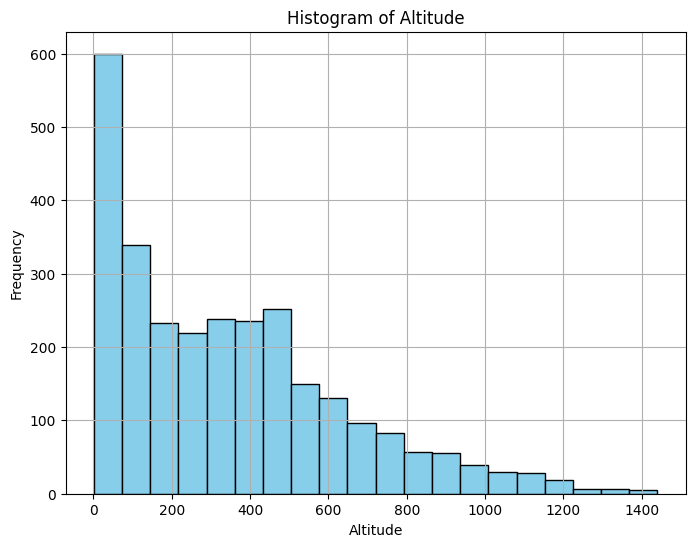

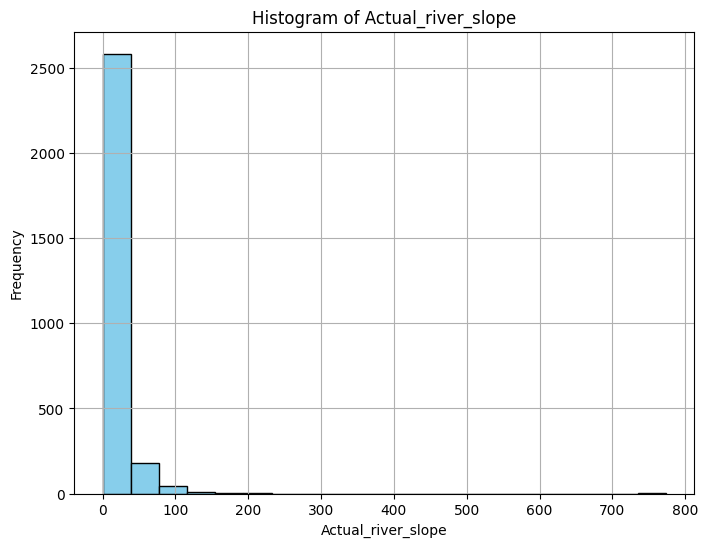

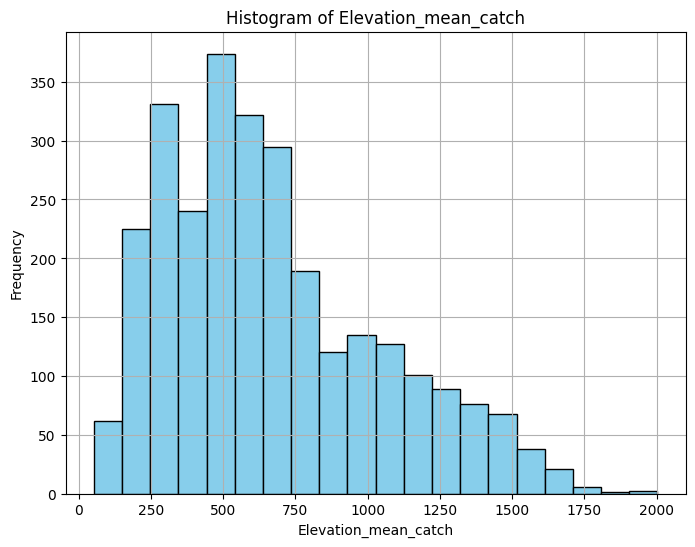

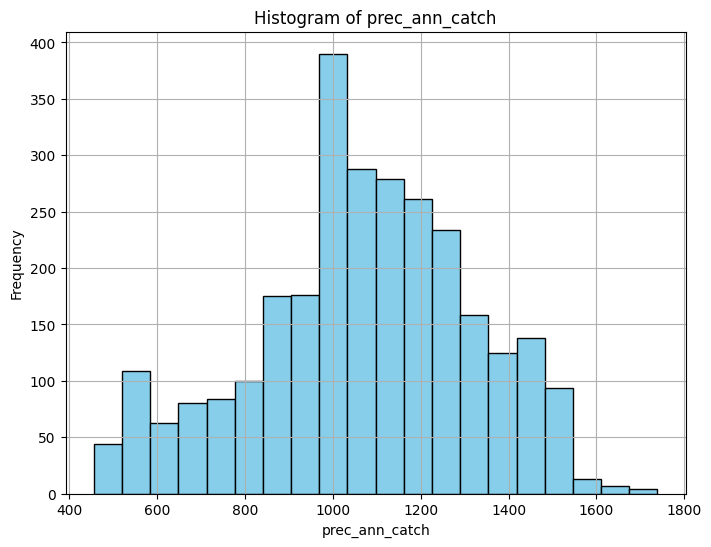

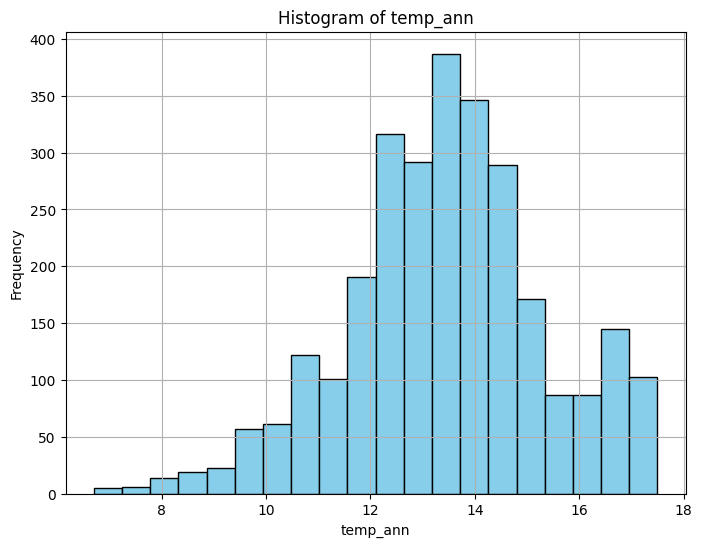

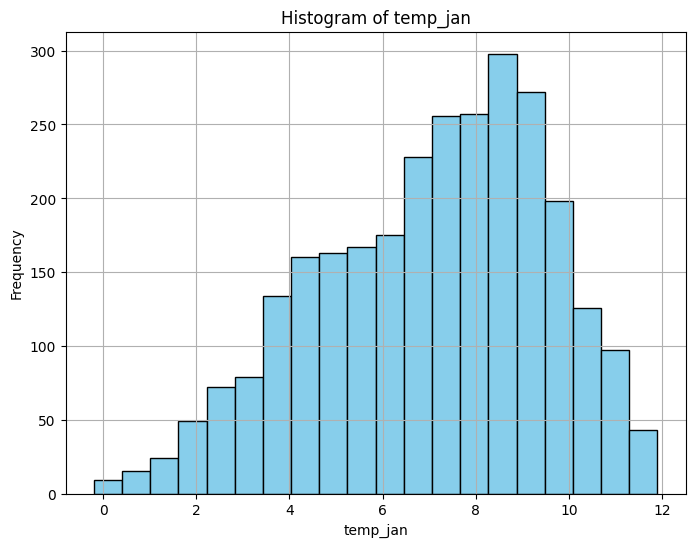

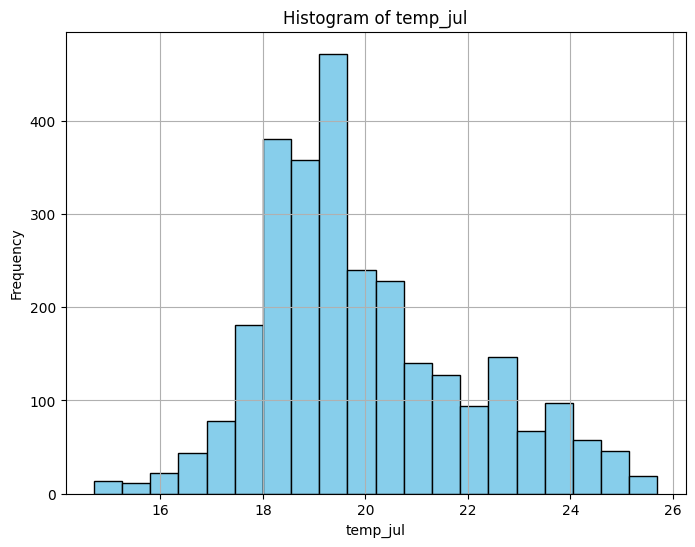

In [13]:
for var in variables:
    plt.figure(figsize=(8, 6))
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [14]:
from scipy.stats import skew

# Loop over DataFrame columns
for var in variables:
    # Calculate skewness
    skewness = skew(df[var])
    print(f'Skewness of {var}: {skewness}')

Skewness of Altitude: 0.9533333178299385
Skewness of Actual_river_slope: 12.750333040720806
Skewness of Elevation_mean_catch: 0.7536979141775817
Skewness of prec_ann_catch: -0.2593279826783156
Skewness of temp_ann: -0.2130832758418813
Skewness of temp_jan: -0.403283137520273
Skewness of temp_jul: 0.6377762889080589


In [15]:
variables_skew = ['Altitude', 'Actual_river_slope']

In [16]:
df2 = df.copy()

In [17]:
variables2 = df2[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

In [18]:
variables_skew2 = df2[['Altitude', 'Actual_river_slope']]


Transformation applied for Altitude: Log transformation
Transformation applied for Actual_river_slope: Log transformation


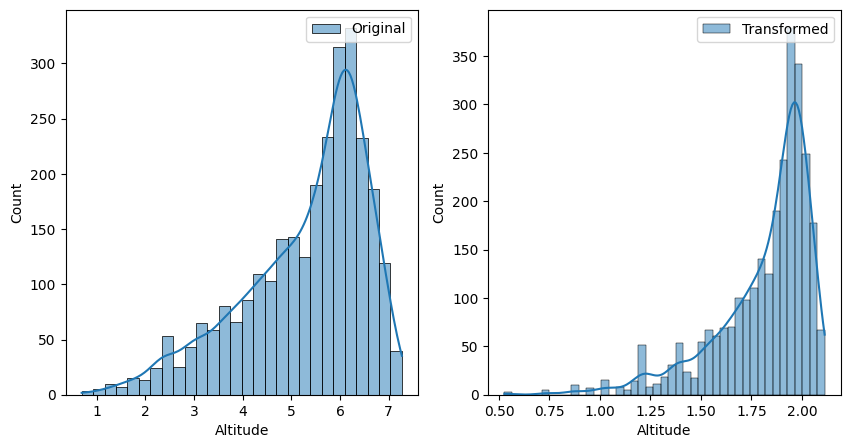

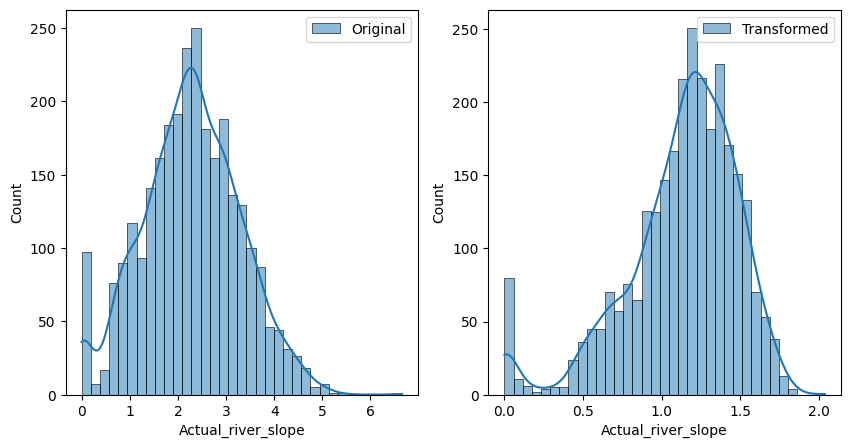

In [20]:


for var in variables_skew2:
    # Apply log transformation (adding a small constant to handle zero values)
    fitted_data = np.log(df2[var] + 1)  # Adding 1 to avoid taking log of zero

    # Create axes to draw plots
    fig, ax = plt.subplots(1, 2)

    # Plot the original data (non-normal) and transformed data (normal)
    sns.histplot(df2[var], kde=True, label="Original", ax=ax[0]).legend(loc="upper right")
    sns.histplot(fitted_data, kde=True, label="Transformed", ax=ax[1]).legend(loc="upper right")

    # Rescale the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    # Print the transformation applied
    print(f"Transformation applied for {var}: Log transformation")

    # Replace the original column with the transformed data
    df2[var] = fitted_data


In [21]:
# Select species columns
species_columns = df2.columns[df2.columns.get_loc('Abramis brama'):]

# Calculate species richness for each sampling site
df2['Species_Richness'] = df2[species_columns].sum(axis=1)

# Display the first few rows of the DataFrame with species richness
print(df2[['Site_code', 'Species_Richness']].head(20))

      Site_code  Species_Richness
18   ES_03_0001                 6
19   ES_03_0002                 6
28   ES_03_0012                 7
32   ES_03_0016                 8
43   ES_03_0029                 7
44   ES_03_0030                 7
60   ES_03_0046                 4
66   ES_03_0053                 7
71   ES_03_0058                 5
91   ES_04_0002                 5
92   ES_04_0003                 5
93   ES_04_0004                 8
94   ES_04_0005                 6
101  ES_05_0012                 7
102  ES_05_0013                 2
126  ES_07_0009                 2
127  ES_07_0010                 3
128  ES_07_0011                 3
169  ES_09_0001                 6
179  ES_09_0011                 7


In [22]:

# Get the integer location of 'Abramis brama' in columns
loc = df2.columns.get_loc('Abramis brama')

# Select species columns
species_columns = df2.columns[loc:]

# Calculate species richness for each sampling site
df2['Species_Richness'] = df2[species_columns].sum(axis=1)

# Display the first few rows of the DataFrame with species richness
print(df2[['Site_code', 'Species_Richness']].head(20))


      Site_code  Species_Richness
18   ES_03_0001                12
19   ES_03_0002                12
28   ES_03_0012                14
32   ES_03_0016                16
43   ES_03_0029                14
44   ES_03_0030                14
60   ES_03_0046                 8
66   ES_03_0053                14
71   ES_03_0058                10
91   ES_04_0002                10
92   ES_04_0003                10
93   ES_04_0004                16
94   ES_04_0005                12
101  ES_05_0012                14
102  ES_05_0013                 4
126  ES_07_0009                 4
127  ES_07_0010                 6
128  ES_07_0011                 6
169  ES_09_0001                12
179  ES_09_0011                14


Regression results for Altitude:

                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     461.3
Date:                Fri, 24 May 2024   Prob (F-statistic):           6.59e-95
Time:                        00:33:17   Log-Likelihood:                -8255.1
No. Observations:                2822   AIC:                         1.651e+04
Df Residuals:                    2820   BIC:                         1.653e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6

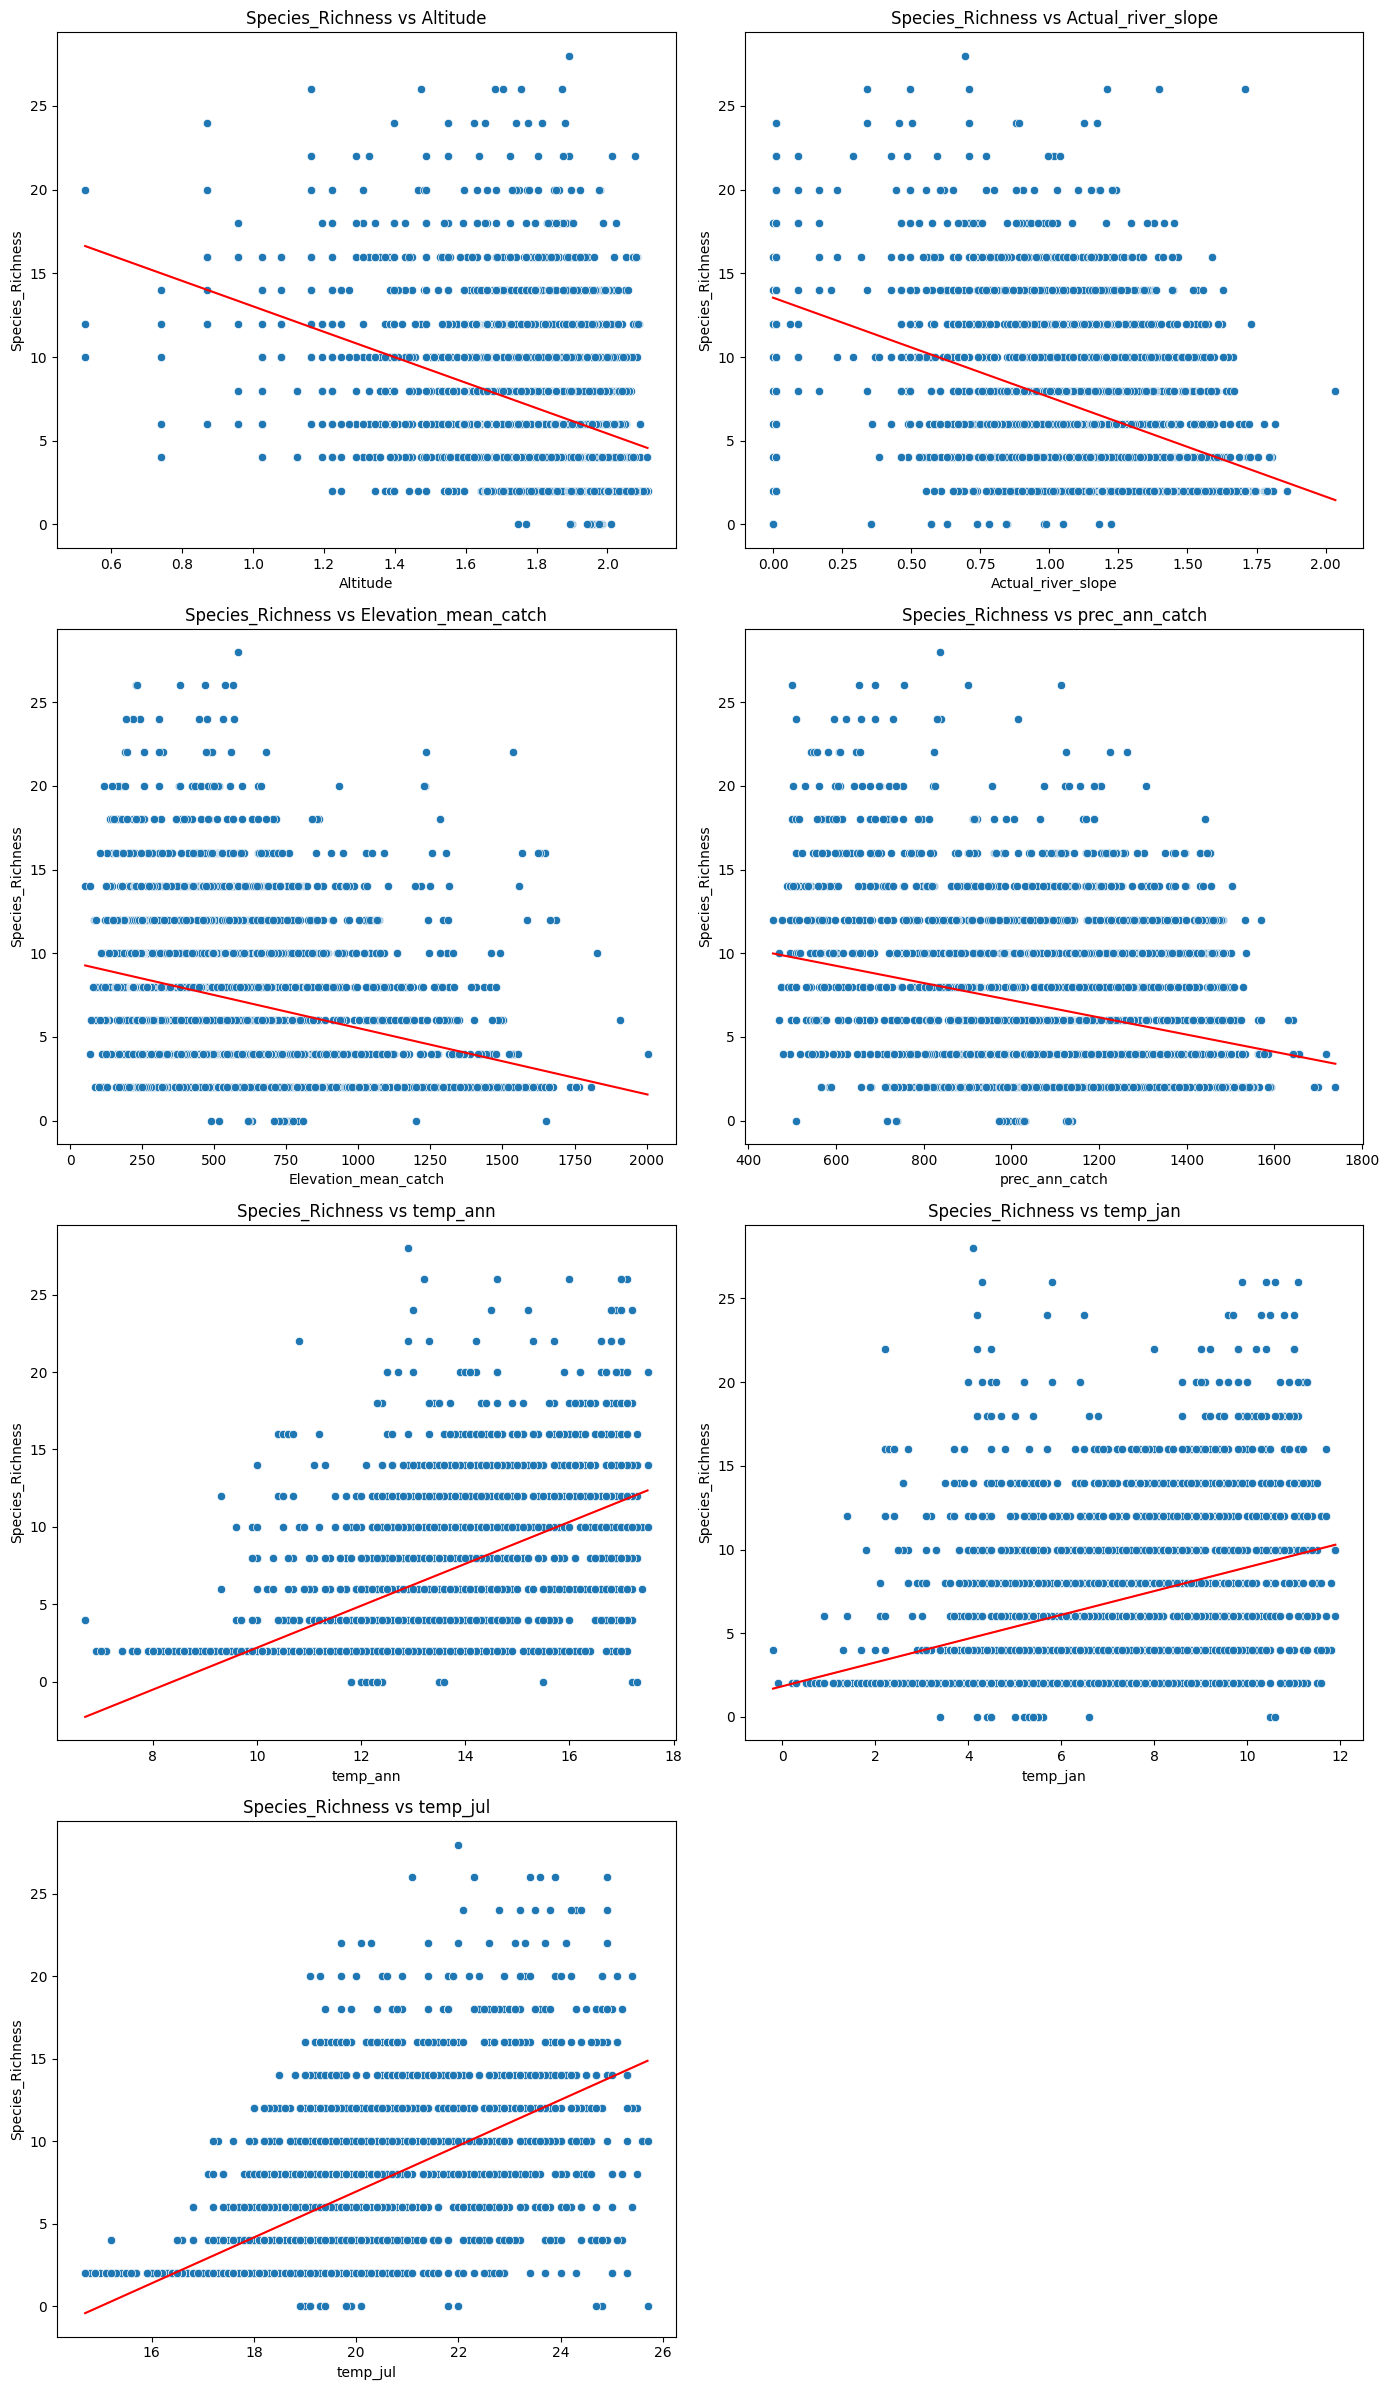

In [23]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables
variables2 = df2[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

# Calculate the number of rows needed for subplots
n = len(variables2.columns)
n_rows = n // 2 if n % 2 == 0 else n // 2 + 1

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array

for i, var in enumerate(variables2):
    # Define the formula for the model
    formula = f'Species_Richness ~ {var}'

    # Fit the model
    model = smf.ols(formula, data=df2).fit()

    # Print the summary of the model
    print(f'Regression results for {var}:\n')
    print(model.summary())
    print('\n' + '-' * 50 + '\n')

    # Plot the data points
    sns.scatterplot(x=var, y='Species_Richness', data=df2, ax=axes[i])
    
    # Plot the regression line
    sns.lineplot(x=df2[var], y=model.fittedvalues, color='red', ax=axes[i])

    # Set plot title and labels
    axes[i].set_title(f'Species_Richness vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Species_Richness')

# Remove unused subplots
if n % 2:
    fig.delaxes(axes[-1])

# Show the plots
plt.tight_layout()
plt.show()


#### Multiple Regression

In [31]:
import statsmodels.formula.api as smf

# Define the formula for the model
formula = 'Species_Richness ~ ' + ' + '.join(variables2.columns)

# Fit the model
model = smf.ols(formula, data=df2).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     381.5
Date:                Fri, 24 May 2024   Prob (F-statistic):          2.29e-147
Time:                        11:20:54   Log-Likelihood:                -8130.9
No. Observations:                2822   AIC:                         1.627e+04
Df Residuals:                    2819   BIC:                         1.629e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.0478      0

In [32]:


# Define the variables
variables2 = df2[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

# Run simple regressions and store results
simple_results = {}
for var in variables2.columns:
    formula = f'Species_Richness ~ {var}'
    model = smf.ols(formula, data=df2).fit()
    simple_results[var] = model.params[var]

# Run multiple regression
formula = 'Species_Richness ~ ' + ' + '.join(variables2.columns)
model = smf.ols(formula, data=df2).fit()
multiple_results = model.params

# Compare coefficients
for var in variables2.columns:
    print(f"For {var}:")
    print(f"Simple regression coefficient: {simple_results[var]}")
    print(f"Multiple regression coefficient: {multiple_results[var]}")
    print('\n' + '-' * 50 + '\n')

For Altitude:
Simple regression coefficient: -7.604829356844353
Multiple regression coefficient: -5.8921241157603745

--------------------------------------------------

For Actual_river_slope:
Simple regression coefficient: -5.943715538996107
Multiple regression coefficient: -2.5628322053523482

--------------------------------------------------

For Elevation_mean_catch:
Simple regression coefficient: -0.003952602061330853
Multiple regression coefficient: -0.000424812247117766

--------------------------------------------------

For prec_ann_catch:
Simple regression coefficient: -0.005137665296417964
Multiple regression coefficient: 0.0010848013909585898

--------------------------------------------------

For temp_ann:
Simple regression coefficient: 1.3550954879748769
Multiple regression coefficient: 0.9996859840776745

--------------------------------------------------

For temp_jan:
Simple regression coefficient: 0.7105661033011377
Multiple regression coefficient: -0.9082356598877

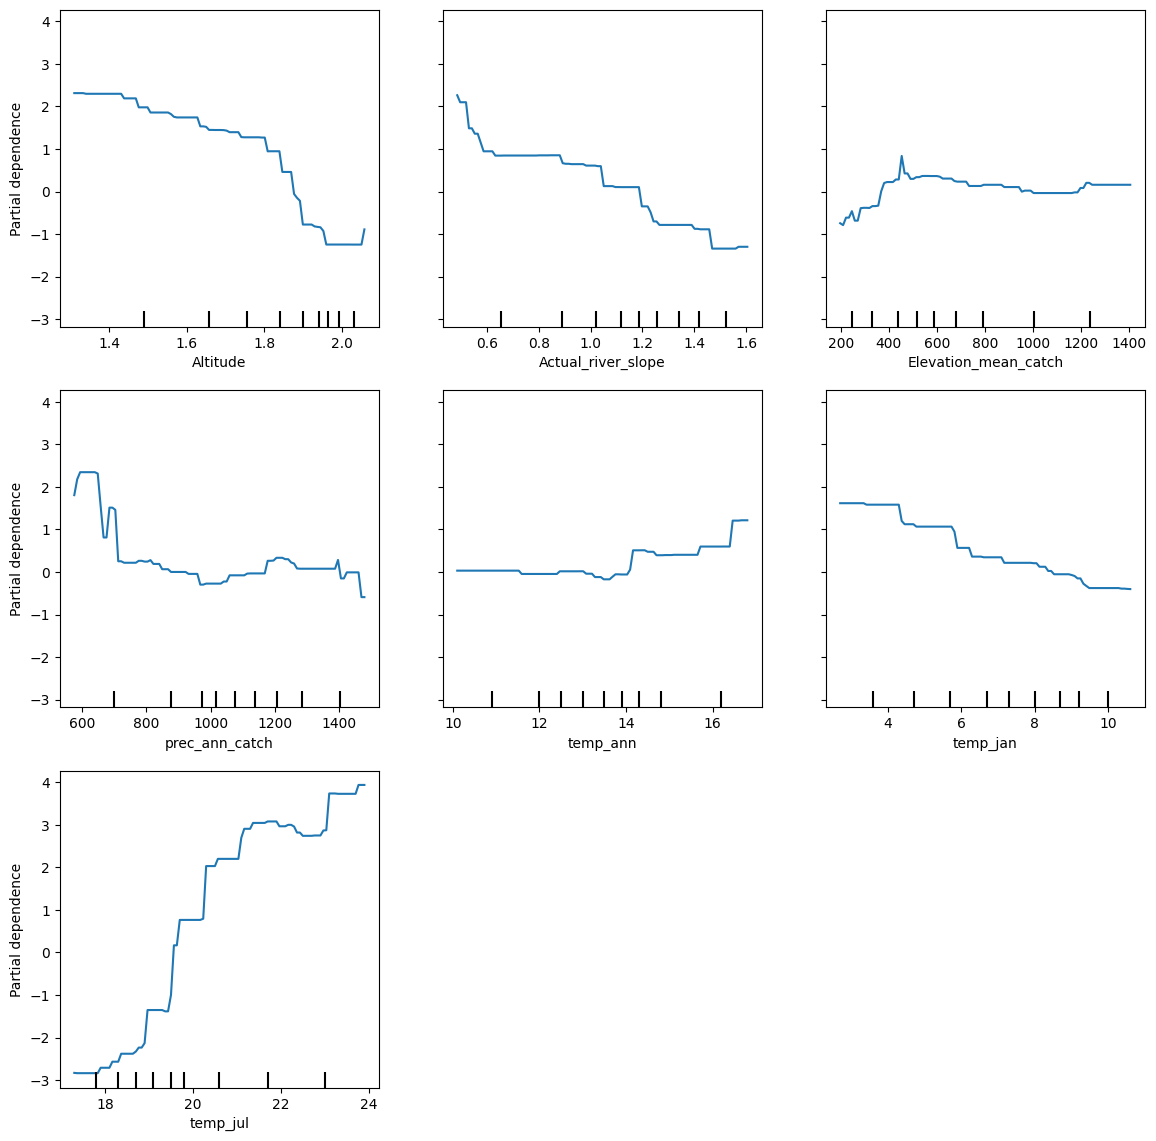

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define the variables
variables2 = df2[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]
X = variables2
y = df2['Species_Richness']

# Fit the model
model = GradientBoostingRegressor().fit(X, y)

# Plot partial dependence plots
fig, ax = plt.subplots(figsize=(14, 14))
PartialDependenceDisplay.from_estimator(model, X, variables2.columns, ax=ax)
plt.show()


#### Multicollinearity Check and Parsimonious Model

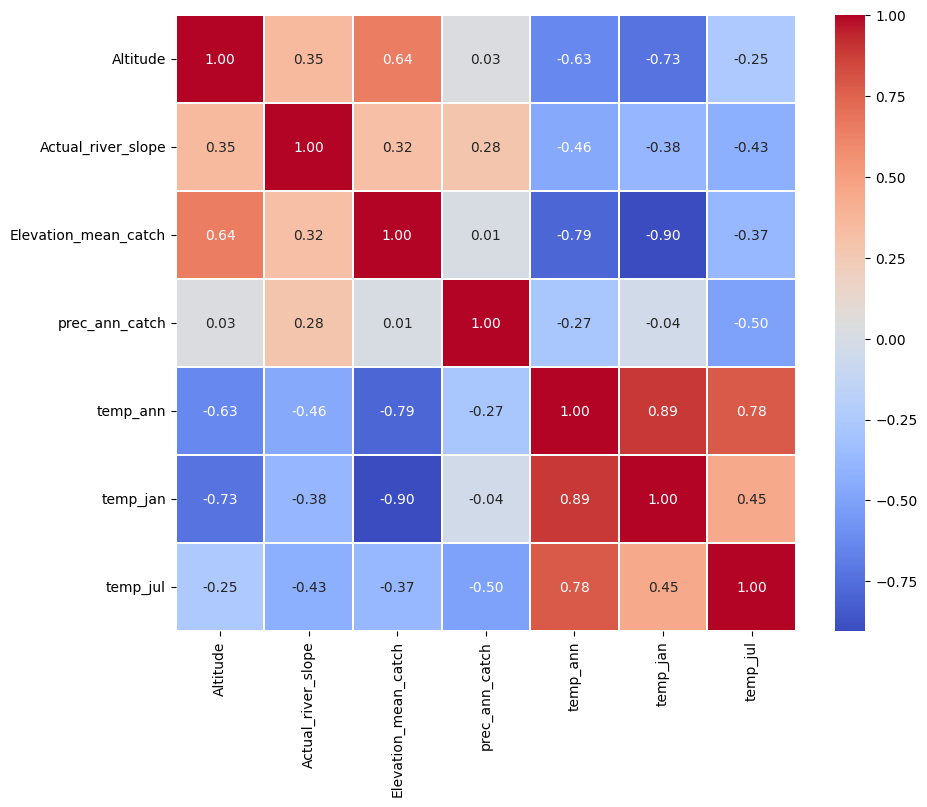

In [27]:
# Calculate the correlation matrix
correlation_matrix = variables2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)

# Show the plot
plt.show()

In [28]:
# Calculate the correlation matrix
correlation_matrix = variables2.corr()

# Identify variables with correlation coefficient > 0.7
highly_correlated = [(var1, var2) for var1 in correlation_matrix.columns for var2 in correlation_matrix.columns if var1 != var2 and abs(correlation_matrix[var1][var2]) > 0.7]

# Print highly correlated pairs
for var1, var2 in highly_correlated:
    print(f"{var1} and {var2} are highly correlated.")

# If you want to remove one of the variables from each pair, you can do so like this:
for var1, var2 in highly_correlated:
    if var2 in variables2.columns:
        variables2 = variables2.drop(var2, axis=1)

Altitude and temp_jan are highly correlated.
Elevation_mean_catch and temp_ann are highly correlated.
Elevation_mean_catch and temp_jan are highly correlated.
temp_ann and Elevation_mean_catch are highly correlated.
temp_ann and temp_jan are highly correlated.
temp_ann and temp_jul are highly correlated.
temp_jan and Altitude are highly correlated.
temp_jan and Elevation_mean_catch are highly correlated.
temp_jan and temp_ann are highly correlated.
temp_jul and temp_ann are highly correlated.


In [34]:
from sklearn.decomposition import PCA

# Fit PCA with the same number of components as variables
pca = PCA(n_components=len(variables2.columns))
pca.fit(variables2)

# Transform variables2 to its first principal components
variables2_pca = pca.transform(variables2)

# Now variables2_pca can be used in place of variables2 in your regression model

In [35]:
import statsmodels.api as sm

# Add a constant to the transformed variables
variables2_pca = sm.add_constant(variables2_pca)

# Fit the model
model_pca = sm.OLS(y, variables2_pca).fit()

# Print the summary of the model
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:       Species_Richness   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     300.3
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        11:22:25   Log-Likelihood:                -7681.7
No. Observations:                2822   AIC:                         1.538e+04
Df Residuals:                    2814   BIC:                         1.543e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8363      0.069     98.523      0.0

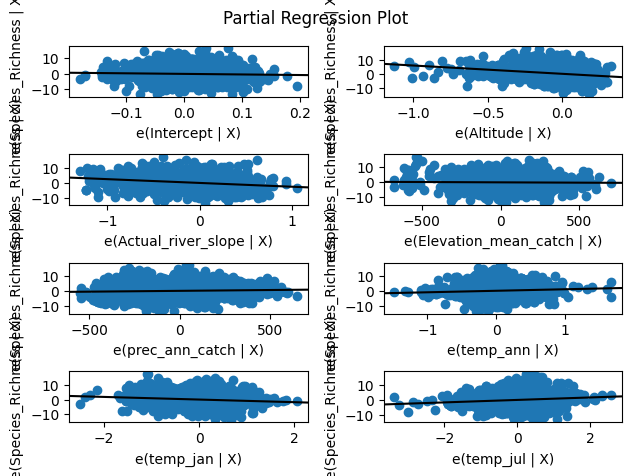

In [33]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)